In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Salary_Data.csv")

In [4]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [7]:
df.shape

(6704, 6)

In [8]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [9]:
# Checking for null values
df.isna().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [10]:
rows_with_NaN = df[df.isnull().any(axis=1)]
rows_with_NaN

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [11]:
# row 172,260 : removing this row as there is nothing that we need here
# row 2011 : Here salary is too big but education level is not present we will get that
# row 3136 , 6455 : We dont have salary here, and it is an important parameter for our project
# row 5247 : Here we dont have years of expereience and salary both of them are important parameters

In [12]:
# We are using mode here as Education Level is categorical value
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode().iloc[0])

In [13]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [14]:
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())

In [15]:
df.isna().sum()

,0
Age,2
Gender,2
Education Level,0
Job Title,2
Years of Experience,0
Salary,0


In [16]:
# Removing those rows with age, gender and job title null values
df = df.dropna()
df.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [17]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.058551,52774.366549
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [18]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2268
Master's Degree,1573
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [19]:
# Changing the duplicate (wrong named) values back
df['Education Level'] = df['Education Level'].replace('phD', 'PhD')
df['Education Level'] = df['Education Level'].replace("Master's", "Master's Degree")
df['Education Level'] = df['Education Level'].replace("Bachelor's", "Bachelor's Degree")

/tmp/ipython-input-19-1075742686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace('phD', 'PhD')
/tmp/ipython-input-19-1075742686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].replace("Master's", "Master's Degree")
/tmp/ipython-input-19-1075742686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [20]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,3024
Master's Degree,1861
PhD,1369
High School,448


In [21]:
df.shape

(6702, 6)

In [22]:
df['Gender'].value_counts()

,count
Gender,
Male,3674
Female,3014
Other,14


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6702 non-null   float64
 5   Salary               6702 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [24]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Junior Social Media Specialist,1
Senior Software Architect,1
Developer,1


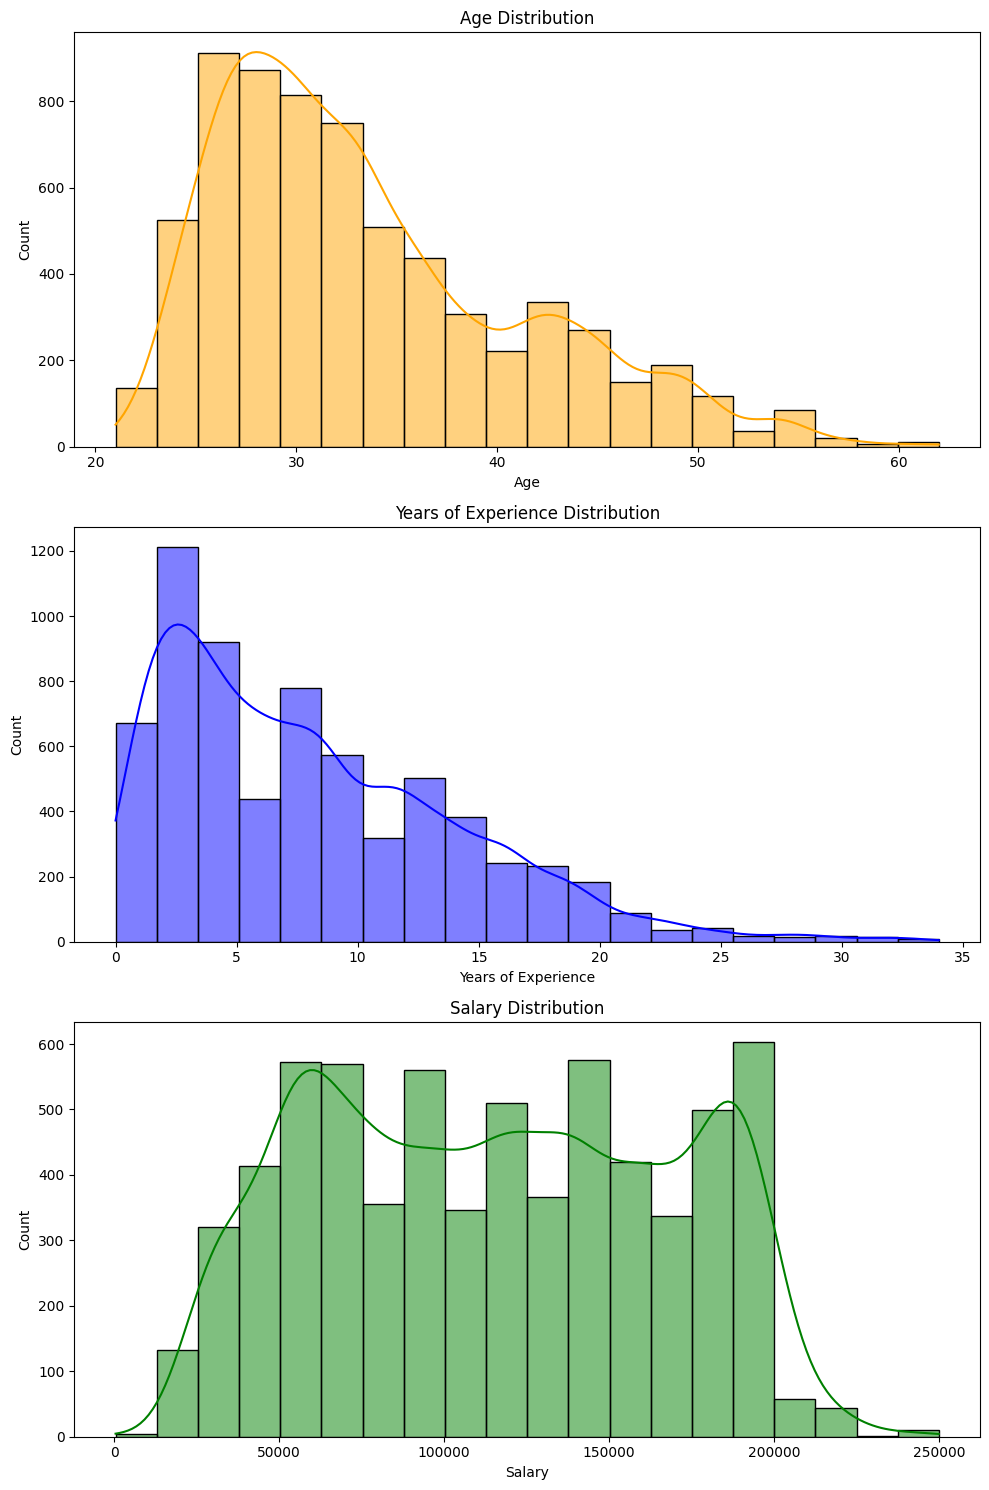

In [25]:
# Using Histogram Technique to analyse the Participation of Candidates in the following data
import seaborn as sns
import matplotlib.pyplot as plt
# Setting up figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Age Distribution')

sns.histplot(df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Years of Experience Distribution')

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Salary Distribution')

plt.tight_layout()
plt.show()


In [26]:
# From above data analysis we can see that lots of people from age range 23 - 38 have participated.
# Salary has varied from 10k usd to 200k usd.
# Years of Experience is more of freshers level (2 to 5 years) and more experienced (6 to 15 years).

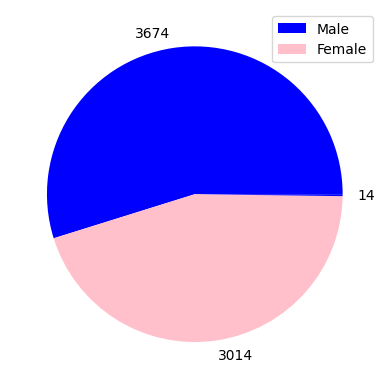

In [27]:
# Using piechart for analysing the participation of males and females
labels = ['Male', 'Female']
colors = ['blue','pink']
gender_c = df['Gender'].value_counts()
plt.pie(gender_c, labels = gender_c,colors=colors)
plt.legend(labels)
plt.show()


In [28]:
# From the above data we can see that about 55% participation by males and 45% by females.

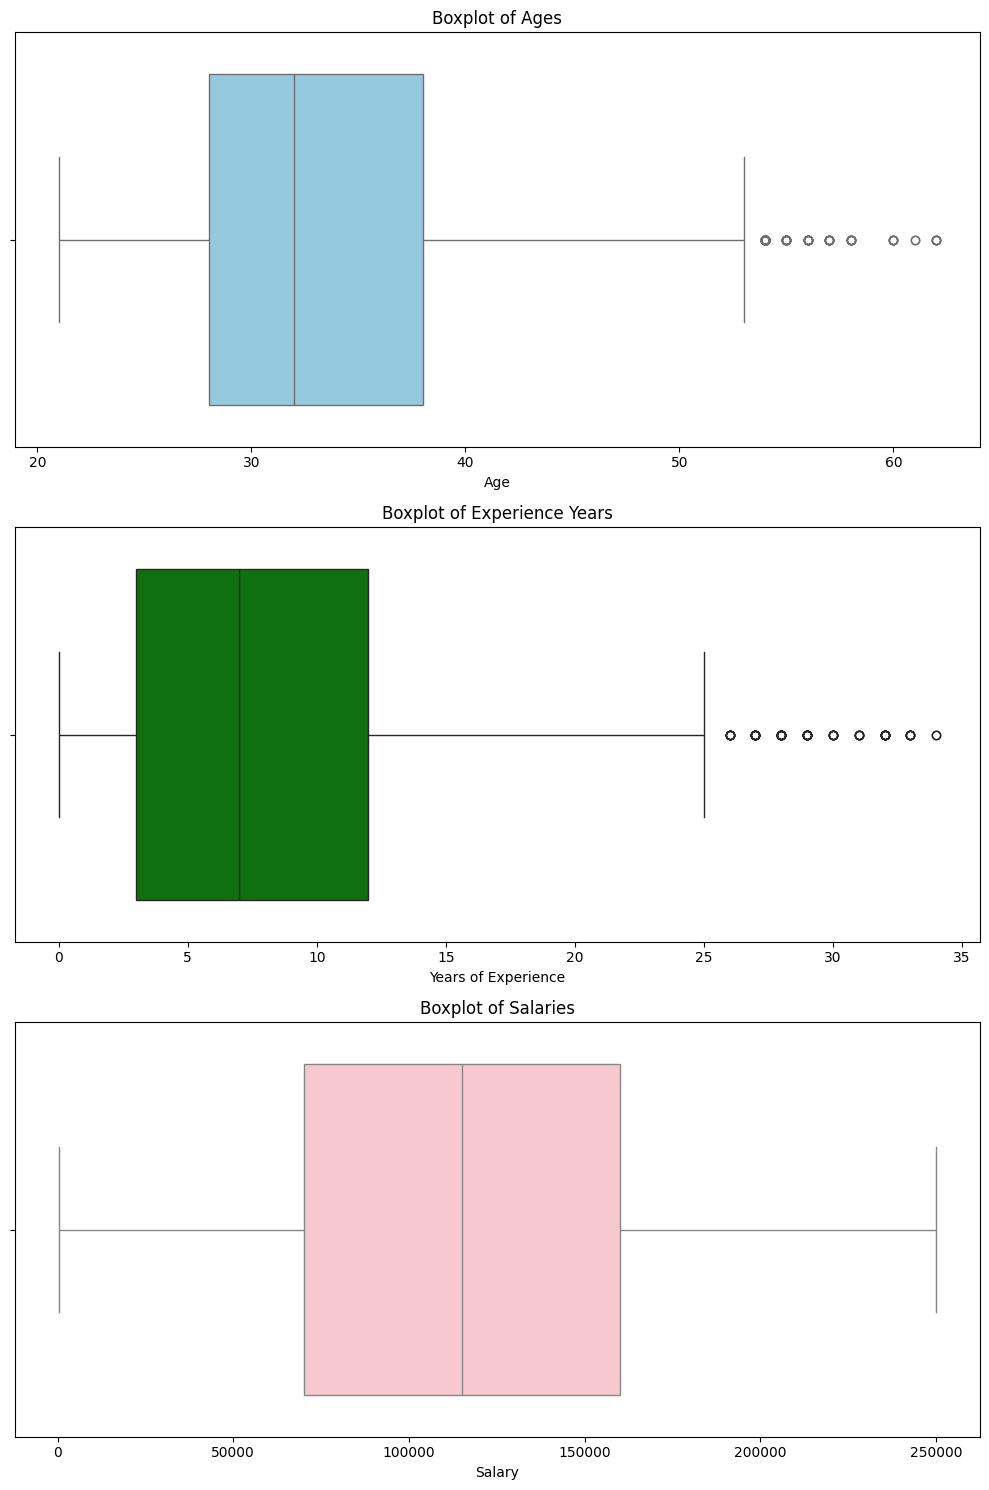

In [29]:
# Using Boxplot for Outlier Detection
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Ages')

sns.boxplot(x=df['Years of Experience'], ax=axes[1], color = 'green')
axes[1].set_title('Boxplot of Experience Years')

sns.boxplot(x=df['Salary'], ax=axes[2], color = 'pink')
axes[2].set_title('Boxplot of Salaries')

plt.tight_layout()
plt.show()

In [30]:
# From the Boxplots we can see that this data has significantly more data on 27-37 age category , 7-13 years of experience and 65k usd to 160k usd.

<Axes: xlabel='Years of Experience', ylabel='Salary'>

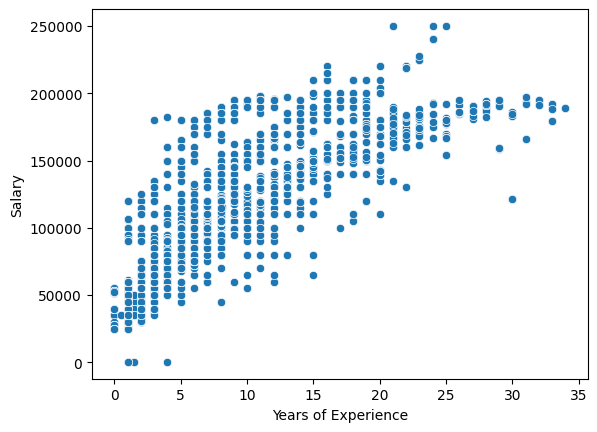

In [31]:
# Trying to Relate to two or more different variables in this data
sns.scatterplot(x="Years of Experience", y="Salary", data=df)

/tmp/ipython-input-32-367598732.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='Job Title',y='Salary',hue='Job Title',data=top_15,palette=colors,legend=False)


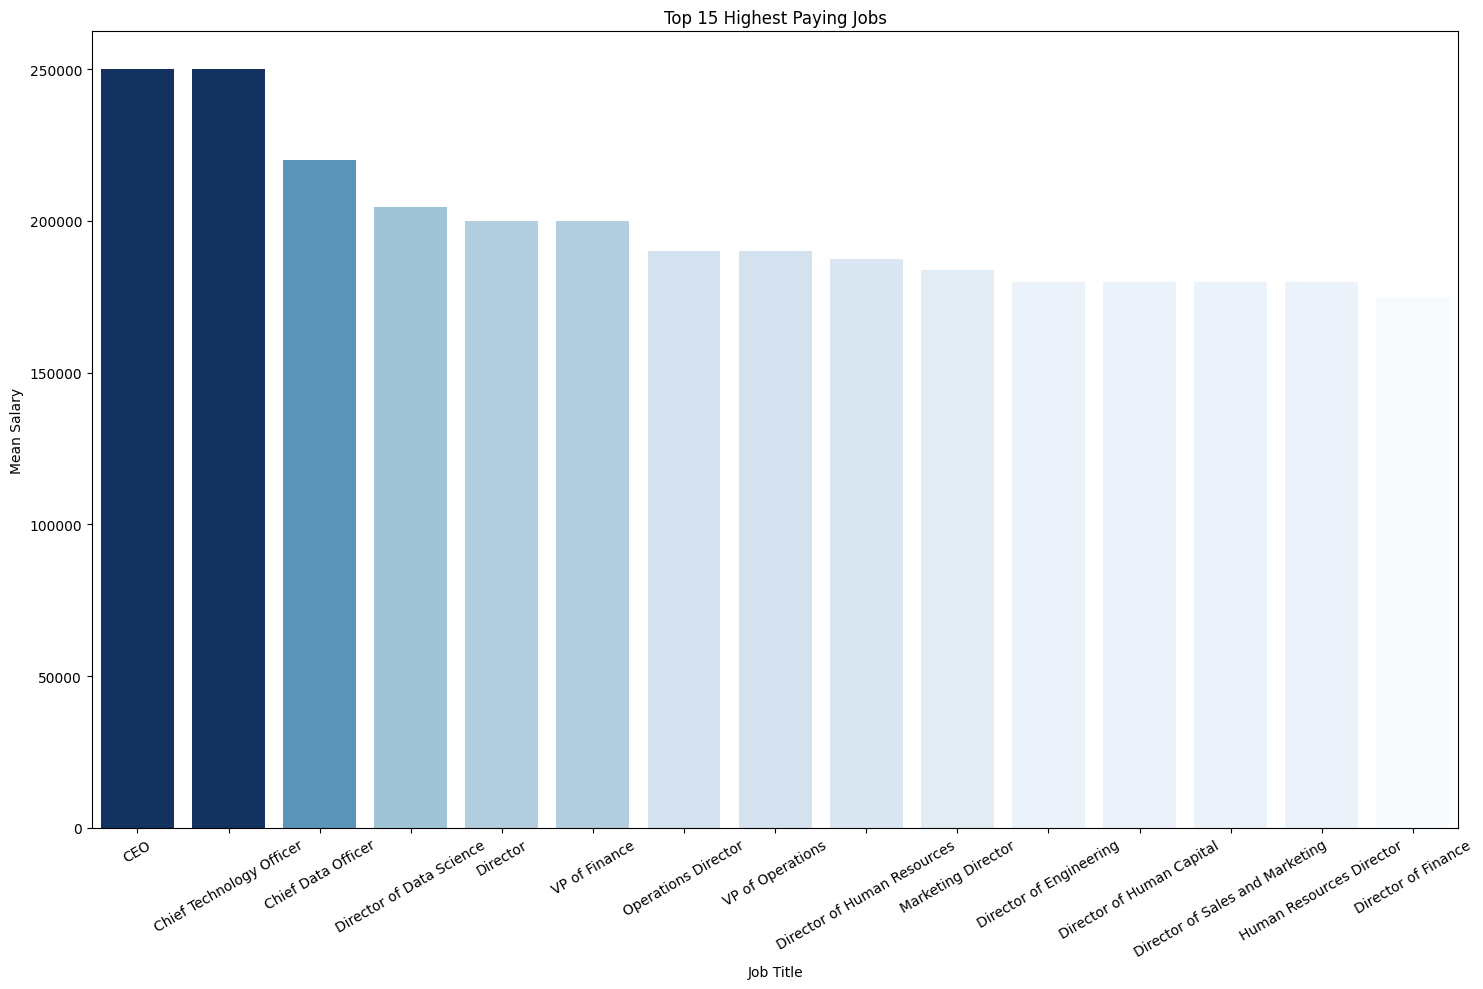

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Grouping Top 15 Job titles by their mean salaries
top_15 = df.groupby('Job Title')['Salary'].mean().nlargest(15).reset_index()

# Normalize the mean salary values
norm = plt.Normalize(top_15['Salary'].min(), top_15['Salary'].max())
cmap = plt.cm.Blues
colors = cmap(norm(top_15['Salary']))

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Job Title',y='Salary',hue='Job Title',data=top_15,palette=colors,legend=False)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 15 Highest Paying Jobs')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

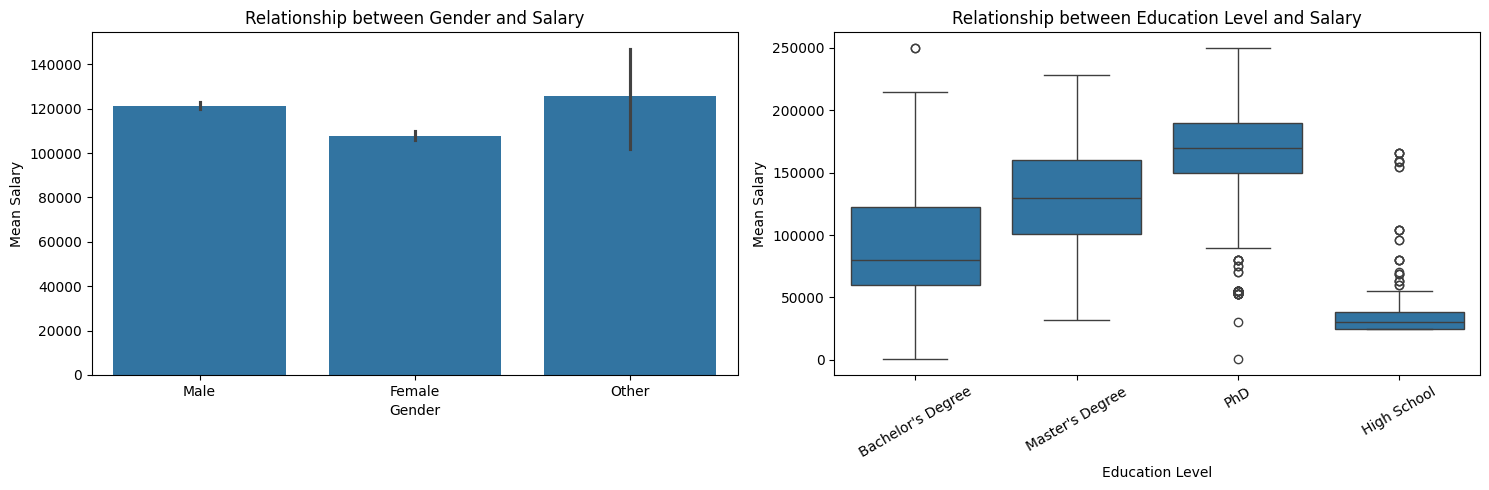

In [33]:
# Relationship between Education Level, Gender and Salary using barplot and boxplot
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))

sns.barplot(x='Gender',y='Salary',data =df, ax=axes[0])
axes[0].set(title='Relationship between Gender and Salary',xlabel='Gender',ylabel='Mean Salary')

sns.boxplot(x='Education Level',y='Salary',data =df, ax=axes[1])
axes[1].set(title='Relationship between Education Level and Salary',xlabel='Education Level',ylabel='Mean Salary')

axes[1].tick_params(axis ='x', rotation = 30)

plt.tight_layout()
plt.show()

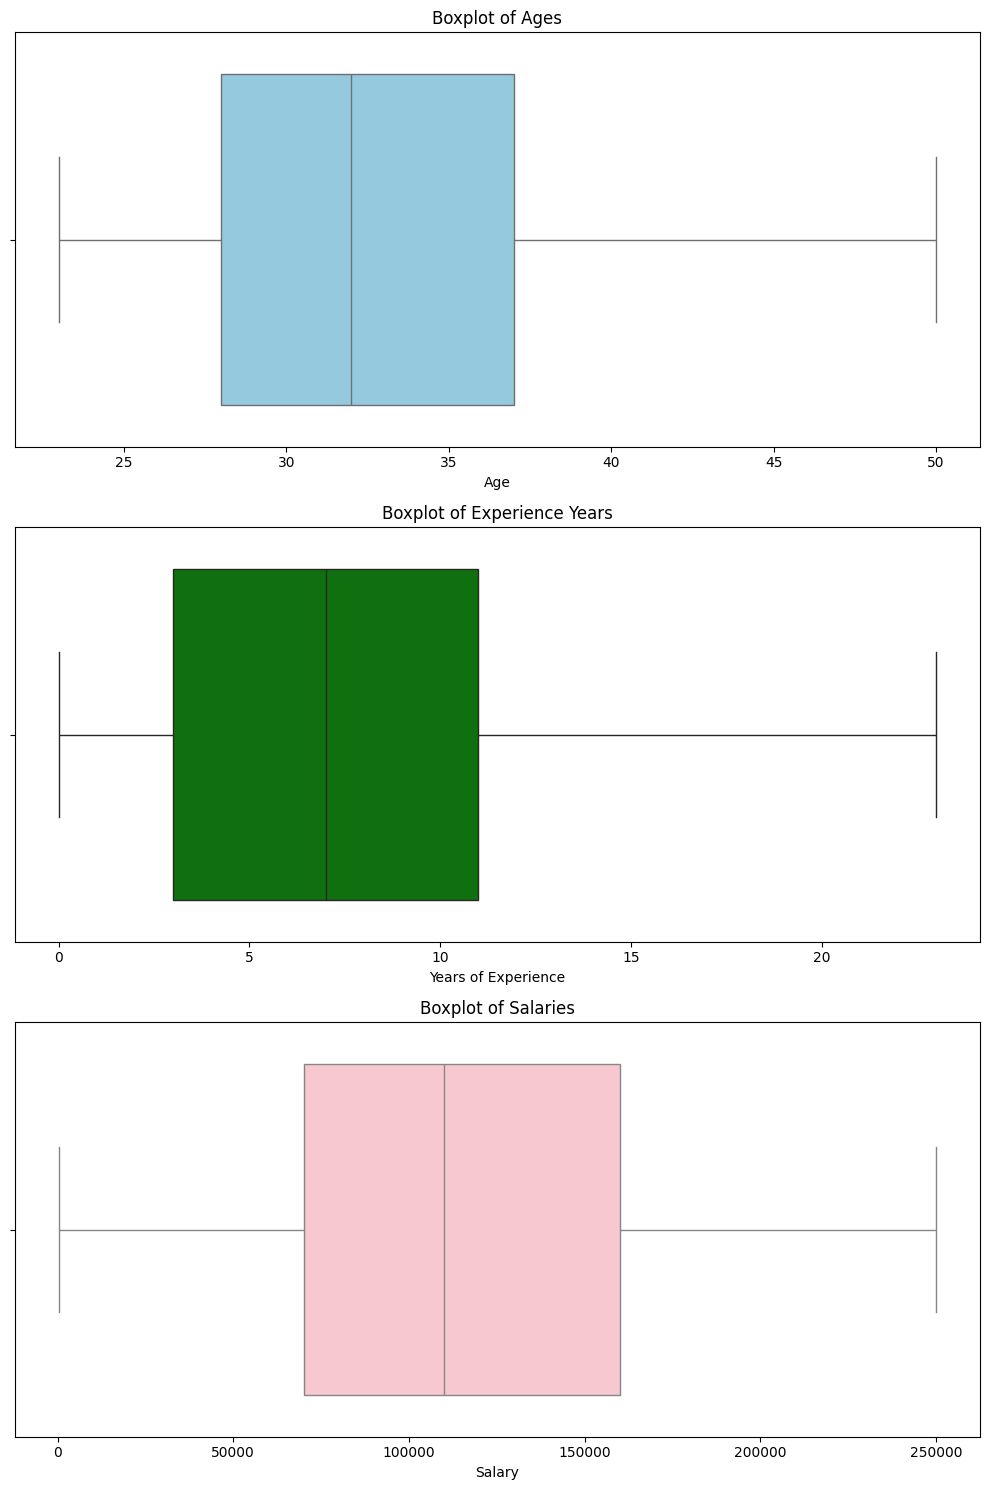

In [34]:
# Cleaning up data little bit more
df=df[(df['Age']<=50)&(df['Age']>=23)]
df=df[(df['Years of Experience']<=23)]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Ages')

sns.boxplot(x=df['Years of Experience'], ax=axes[1], color = 'green')
axes[1].set_title('Boxplot of Experience Years')

sns.boxplot(x=df['Salary'], ax=axes[2], color = 'pink')
axes[2].set_title('Boxplot of Salaries')

plt.tight_layout()
plt.show()

In [35]:
df.shape

(6456, 6)

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# Separate features and target
X = df.drop(columns=['Salary'])
y = df['Salary']

# Identify columns
categorical_cols = ['Gender', 'Education Level', 'Job Title']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model + Grid Definitions
def get_models_and_grids():
    models = {
        "Linear Regression": (LinearRegression(), {}),
        "Random Forest": (RandomForestRegressor(), {
            'model__n_estimators': [50, 100],
            'model__max_depth': [None, 10, 20]
        }),
        "KNN": (KNeighborsRegressor(), {
            'model__n_neighbors': [3, 5, 7]
        }),
        "SVR": (SVR(), {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }),
        "Gradient Boosting": (GradientBoostingRegressor(), {
            'model__n_estimators': [50, 100],
            'model__learning_rate': [0.05, 0.1]
        })
    }
    return models

# Evaluation
def evaluate_models(x_train, x_test, y_train, y_test):
    models_and_grids = get_models_and_grids()
    results = {}
    best_model = None
    best_score = -np.inf

    # Define preprocessing
    preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

    for name, (model, param_grid) in models_and_grids.items():
        print(f"\n🔍 Tuning and training {name}...")

        # Create pipeline
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Grid search
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid.fit(x_train, y_train)

        best_estimator = grid.best_estimator_
        y_pred = best_estimator.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {
            "R2 Score": r2,
            "MSE": mse,
            "RMSE": rmse,
            "Best Params": grid.best_params_
        }

        if r2 > best_score:
            best_score = r2
            best_model = best_estimator

        print(f"✅ R²: {r2:.4f}, RMSE: {rmse:.2f}")
        print("📊 Best Params:", grid.best_params_)

    return results, best_model

# Run evaluation
results, best_model = evaluate_models(x_train, x_test, y_train, y_test)
joblib.dump(best_model, 'best_salary_model.pkl')
print("\n✅ Best model saved as 'best_salary_model.pkl'")

# Summary
print("\n📌 Summary of Results:")
for name, info in results.items():
    print(f"{name}: R² = {info['R2 Score']:.4f}, RMSE = {info['RMSE']:.2f}")



🔍 Tuning and training Linear Regression...
✅ R²: 0.8447, RMSE: 20449.94
📊 Best Params: {}

🔍 Tuning and training Random Forest...
✅ R²: 0.9733, RMSE: 8475.70
📊 Best Params: {'model__max_depth': None, 'model__n_estimators': 100}

🔍 Tuning and training KNN...
✅ R²: 0.9618, RMSE: 10143.08
📊 Best Params: {'model__n_neighbors': 3}

🔍 Tuning and training SVR...
✅ R²: 0.6225, RMSE: 31881.89
📊 Best Params: {'model__C': 10, 'model__kernel': 'linear'}

🔍 Tuning and training Gradient Boosting...
✅ R²: 0.9075, RMSE: 15784.78
📊 Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 100}

✅ Best model saved as 'best_salary_model.pkl'

📌 Summary of Results:
Linear Regression: R² = 0.8447, RMSE = 20449.94
Random Forest: R² = 0.9733, RMSE = 8475.70
KNN: R² = 0.9618, RMSE = 10143.08
SVR: R² = 0.6225, RMSE = 31881.89
Gradient Boosting: R² = 0.9075, RMSE = 15784.78


/tmp/ipython-input-37-3217160980.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2 Score", data=df, ax=axes[0], palette=palette_r2)
/tmp/ipython-input-37-3217160980.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=df, ax=axes[1], palette=palette_rmse)


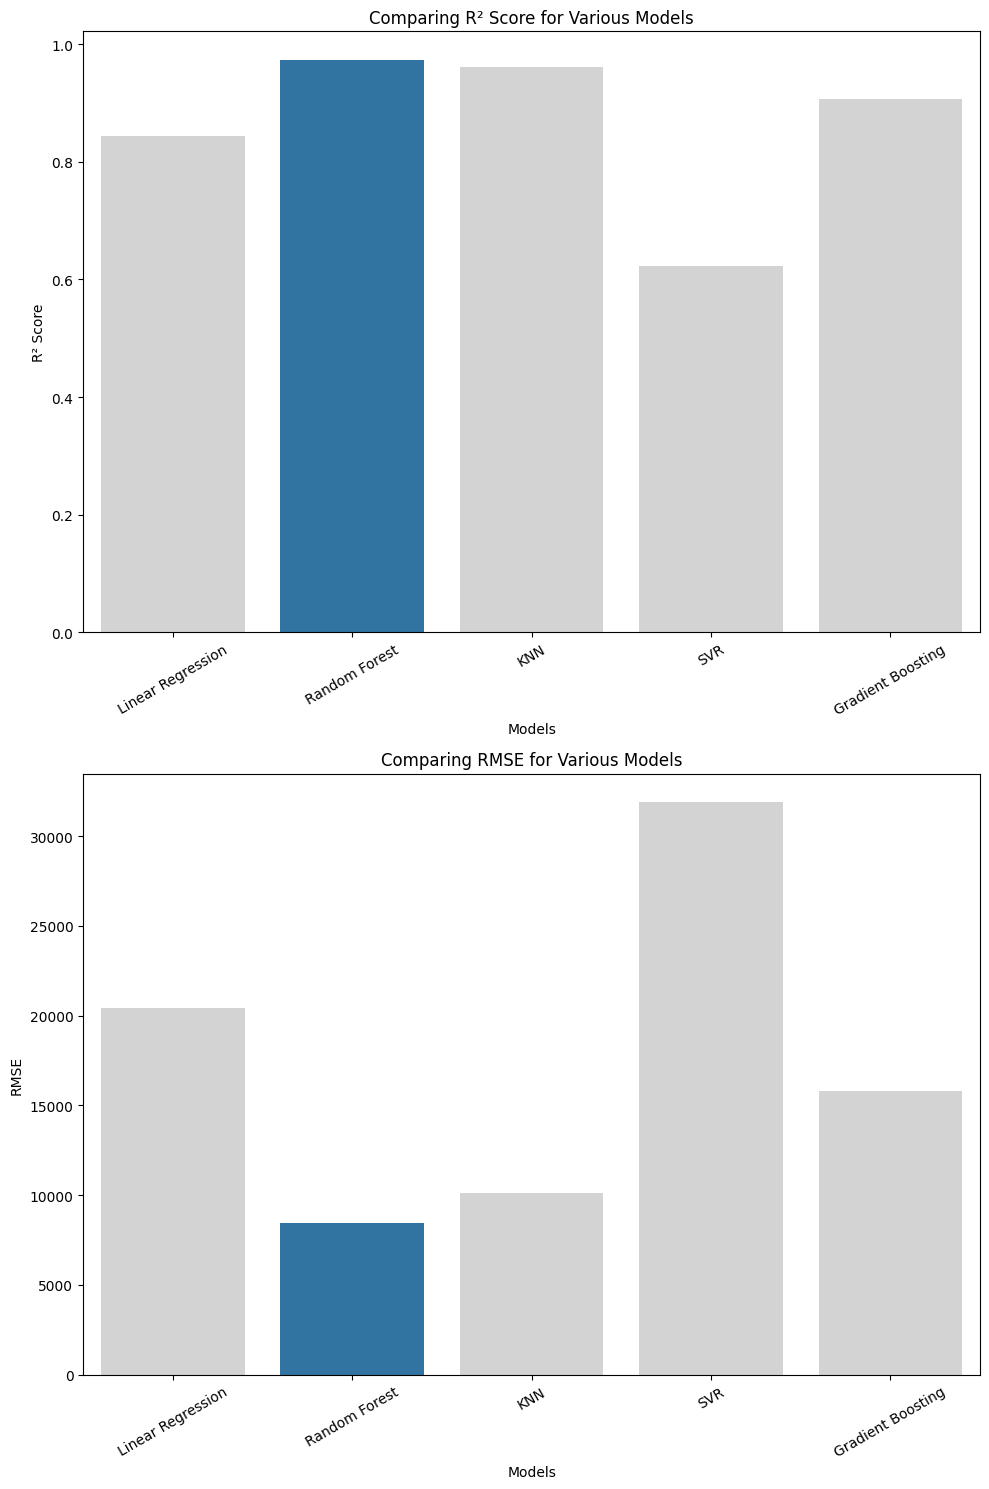

In [37]:
# Comparing Models
# Preparing the results DataFrame
df = pd.DataFrame([
    {"Model": name,
     "R2 Score": info["R2 Score"],
     "RMSE": info["RMSE"] }
    for name, info in results.items()
])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Identify the best model by R² Score
best_model_name = df.loc[df["R2 Score"].idxmax(), "Model"]

# Create color palette to highlight best model
def make_palette(df, best_model_name, color_best="#1f77b4", color_others="#d3d3d3"):
    return [color_best if model == best_model_name else color_others for model in df["Model"]]

# Generate palettes for each metric
palette_r2 = make_palette(df, best_model_name)
palette_rmse = make_palette(df, best_model_name)

# R2 Score subplot
sns.barplot(x="Model", y="R2 Score", data=df, ax=axes[0], palette=palette_r2)
axes[0].set_title("Comparing R² Score for Various Models")
axes[0].set_xlabel("Models")
axes[0].set_ylabel("R² Score")

# RMSE value subplot
sns.barplot(x="Model", y="RMSE", data=df, ax=axes[1], palette=palette_rmse)
axes[1].set_title("Comparing RMSE for Various Models")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("RMSE")

axes[0].tick_params(axis ='x', rotation = 30)
axes[1].tick_params(axis ='x', rotation = 30)

plt.tight_layout()
plt.show()

In [38]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 510.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [39]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the model
model = joblib.load("best_salary_model.pkl")

st.set_page_config(page_title="💼Employee Salary Prediction", page_icon="💰", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Welcome! Fill in the details below to estimate the monthly salary")

# Sidebar inputs
st.markdown("---")
st.subheader("👤 Employee Information")

col1, col2 = st.columns(2)
with col1:
    age = st.slider("Age", min_value=23, max_value=50, value=30)
    education = st.selectbox("Education Level", ["Bachelor's Degree", "Master's Degree", "PhD", "High School"])
    experience = st.slider("Years of Experience", min_value=0, max_value=23, value=7)

with col2:
    gender = st.selectbox("Gender", ["Male", "Female"])
    job_title = st.selectbox("Job Title", [
        'Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director',
        'Marketing Analyst', 'Product Manager', 'Sales Manager', 'Marketing Coordinator',
        'Senior Scientist', 'Software Developer', 'HR Manager', 'Financial Analyst',
        'Project Manager', 'Customer Service Rep', 'Operations Manager', 'Marketing Manager',
        'Senior Engineer', 'Data Entry Clerk', 'Sales Director', 'Business Analyst',
        'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
        'Social Media Specialist', 'Software Manager', 'Junior Developer',
        'Senior Consultant', 'Product Designer', 'CEO', 'Accountant', 'Data Scientist',
        'Marketing Specialist', 'Technical Writer', 'HR Generalist', 'Project Engineer',
        'Customer Success Rep', 'Sales Executive', 'UX Designer', 'Operations Director',
        'Network Engineer', 'Administrative Assistant', 'Strategy Consultant', 'Copywriter',
        'Account Manager', 'Director of Marketing', 'Help Desk Analyst',
        'Customer Service Manager', 'Business Intelligence Analyst', 'Event Coordinator',
        'VP of Finance', 'Graphic Designer', 'UX Researcher', 'Social Media Manager',
        'Director of Operations', 'Senior Data Scientist', 'Junior Accountant',
        'Digital Marketing Manager', 'IT Manager', 'Customer Service Representative',
        'Business Development Manager', 'Senior Financial Analyst', 'Web Developer',
        'Research Director', 'Technical Support Specialist', 'Creative Director',
        'Senior Software Engineer', 'Human Resources Director', 'Content Marketing Manager',
        'Technical Recruiter', 'Sales Representative', 'Chief Technology Officer',
        'Junior Designer', 'Financial Advisor', 'Junior Account Manager',
        'Senior Project Manager', 'Principal Scientist', 'Supply Chain Manager',
        'Senior Marketing Manager', 'Training Specialist', 'Research Scientist',
        'Junior Software Developer', 'Public Relations Manager', 'Operations Analyst',
        'Product Marketing Manager', 'Senior HR Manager', 'Junior Web Developer',
        'Senior Project Coordinator', 'Chief Data Officer', 'Digital Content Producer',
        'IT Support Specialist', 'Senior Marketing Analyst', 'Customer Success Manager',
        'Senior Graphic Designer', 'Software Project Manager', 'Supply Chain Analyst',
        'Senior Business Analyst', 'Junior Marketing Analyst', 'Office Manager',
        'Principal Engineer', 'Junior HR Generalist', 'Senior Product Manager',
        'Junior Operations Analyst', 'Senior HR Generalist', 'Sales Operations Manager',
        'Senior Software Developer', 'Junior Web Designer', 'Senior Training Specialist',
        'Senior Research Scientist', 'Junior Sales Representative', 'Junior Marketing Manager',
        'Junior Data Analyst', 'Senior Product Marketing Manager', 'Junior Business Analyst',
        'Senior Sales Manager', 'Junior Marketing Specialist', 'Junior Project Manager',
        'Senior Accountant', 'Director of Sales', 'Junior Recruiter',
        'Senior Business Development Manager', 'Senior Product Designer',
        'Junior Customer Support Specialist', 'Senior IT Support Specialist',
        'Junior Financial Analyst', 'Senior Operations Manager', 'Director of Human Resources',
        'Junior Software Engineer', 'Senior Sales Representative',
        'Director of Product Management', 'Junior Copywriter',
        'Senior Marketing Coordinator', 'Senior Human Resources Manager',
        'Junior Business Development Associate', 'Senior Account Manager',
        'Senior Researcher', 'Junior HR Coordinator', 'Director of Finance',
        'Junior Marketing Coordinator', 'Junior Data Scientist', 'Senior Operations Analyst',
        'Senior Human Resources Coordinator', 'Senior UX Designer', 'Junior Product Manager',
        'Senior Marketing Specialist', 'Senior IT Project Manager',
        'Senior Quality Assurance Analyst', 'Director of Sales and Marketing',
        'Senior Account Executive', 'Director of Business Development',
        'Junior Social Media Manager', 'Senior Human Resources Specialist',
        'Senior Data Analyst', 'Director of Human Capital', 'Junior Advertising Coordinator',
        'Junior UX Designer', 'Senior Marketing Director', 'Senior IT Consultant',
        'Senior Financial Advisor', 'Junior Business Operations Analyst',
        'Junior Social Media Specialist', 'Senior Product Development Manager',
        'Junior Operations Manager', 'Senior Software Architect', 'Junior Research Scientist',
        'Senior Financial Manager', 'Senior HR Specialist', 'Senior Data Engineer',
        'Junior Operations Coordinator', 'Director of HR', 'Senior Operations Coordinator',
        'Junior Financial Advisor', 'Director of Engineering', 'Software Engineer Manager',
        'Back end Developer', 'Senior Project Engineer', 'Full Stack Engineer',
        'Front end Developer', 'Developer', 'Front End Developer', 'Director of Data Science',
        'Human Resources Coordinator', 'Junior Sales Associate', 'Human Resources Manager',
        'Juniour HR Generalist', 'Juniour HR Coordinator', 'Digital Marketing Specialist',
        'Receptionist', 'Marketing Director', 'Social M', 'Social Media Man', 'Delivery Driver'
    ])

# Build input DataFrame
input_df = pd.DataFrame({
    'Age': [age],
    'Gender': [gender],
    'Education Level': [education],
    'Job Title': [job_title],
    'Years of Experience': [experience]
})

st.markdown("---")
st.write("### 🔍 Input Preview")
st.write(input_df)

if st.button("📈 Predict Salary"):
    prediction = model.predict(input_df)
    st.success(f"💰 Predicted Salary: ₹{int(prediction[0]):,} per month")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch CSV Prediction")
uploaded_file = st.file_uploader("Upload CSV for batch prediction", type="csv")

if uploaded_file:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data["Predicted Salary"] = batch_preds
    st.write("✅ Batch Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode("utf-8")
    st.download_button("Download CSV", csv, file_name="salary_predictions.csv", mime="text/csv")

Writing app.py


In [40]:
 from pyngrok import ngrok
 ngrok.set_auth_token("307qJLzVzAsRq21P3LWmBLyALCV_41QAreFB8WsGk8qLadZrc")

In [41]:
import os
import threading

def run_streamlit():
  os.system('streamlit run app.py --server.port 8501 &')

# Run Streamlit in a separate thread
streamlit_thread = threading.Thread(target=run_streamlit)
streamlit_thread.start()

In [42]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url=ngrok.connect(8501)
print("Your Streamlit app is live here:",public_url)


Your Streamlit app is live here: NgrokTunnel: "https://252b888de37a.ngrok-free.app" -> "http://localhost:8501"
